In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d
from copy import copy

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

### Scheme

At any $k+1^{th}$ iteration we can write the difference equation as
$$ u^{k+1}_{i j} = \frac{\partial{y}^2 (u^{k+1}_{i-1 j} + u^{k}_{i+1 j}) + \partial{x}^2(u^{k+1}_{i j-1} + u^{k}_{i j+1})} {2 (\partial{x}^2 + \partial{y}^2) } - \frac{\partial{x}^2\partial{y}^2(x_i^2 + y_j^2)}{2 (\partial{x}^2 + \partial{y}^2) }$$

 And continue the iteration till $$  \max_{\substack{1 \leq i \leq N-1\\1 \leq j \leq M-1}}  \bigl|u^{k+1}_{i j} - u^{k}_{i j} \bigl| \; \leq \epsilon $$

We need to solve the PDE 
$$ u_{xx} + u_{yy} = x^2  + y^2 $$
for the boundary conditions
$$ 0 \leq x \; , y \leq 1 $$ 

$ u = 0 $ on the boundaries

In [16]:
def GaussSeidel(u, space_step_x, space_step_y, epsilon):
    u_ = copy(u)
    steps_x , steps_y = int(u.shape[0]) - 1, int(u.shape[1]) - 1
    u_iter = np.zeros((steps_x + 1, steps_y + 1))
    difference_matrix = np.ones((steps_x, steps_y))
    iterations = 0
    while(np.amax(difference_matrix)>epsilon):
        iterations += 1
        for i in range(steps_x + 1):
            for j in range(steps_y + 1):
                if( i == 0 or i == steps_x or j == 0 or j == steps_y):
                    u_iter[i][j] = u[i][j]
                else:
                    u_iter[i][j] = (space_step_y**2*(u_iter[i-1][j] + u[i+1][j]) + 
                                    space_step_x**2*(u_iter[i][j-1] + u[i][j+1]))/(2*(space_step_x**2 + space_step_y**2)) - (space_step_x**2 * space_step_y**2/(2*(space_step_x**2 + space_step_y**2)))*((0 + i*space_step_x)**2 + (0 + i*space_step_y)**2)
#                     print((space_step_y**2*(u_iter[i-1][j] + u[i+1][j]) + space_step_x**2*(u_iter[i][j-1] + u[i][j+1]))/(2*(space_step_x**2 + space_step_y**2)))
        difference_matrix = np.absolute(u_iter - u)
        u = copy(u_iter)
    print("Iterations: ", iterations)
        
    return u
            
    

Iterations:  13
Iterations:  44
Iterations:  138


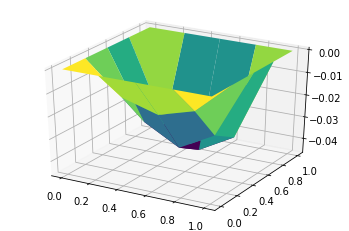

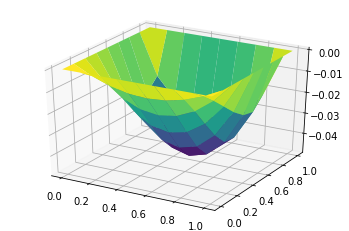

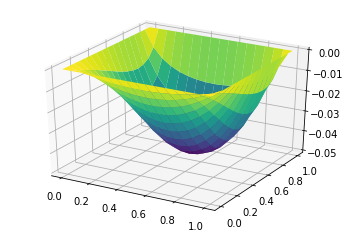

In [17]:
space_step_x = space_step_y = [0.25, 0.125, 0.0625]
x0 = y0 = 0 
xn = yn = 1
def initialize(x0, y0, steps_x, steps_y, space_step_x, space_step_y ):
    #     initialize the solution wrt u = x^2*y^2
    u = np.zeros((int(steps_x+1), int(steps_y+1)))
    for i in range(int(steps_x + 1)):
        for j in range(int(steps_y + 1)):
            if( i == 0 or i == steps_x or j == 0 or j == steps_y):
                u[i][j] = 0
            else:
                u[i][j] = 0
    return u
for steps in space_step_x:
    steps_x = steps_y = np.floor((xn - x0)/steps)
    x = np.linspace(x0, xn, num=int(steps_x + 1))
    y = np.linspace(y0, yn, num=int(steps_y + 1))

    u = initialize(x0, y0, steps_x, steps_y, steps, steps)
    u = GaussSeidel(u, steps, steps, epsilon=0.00001)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X, Y = np.meshgrid(x,y)

    ax.plot_surface(X, Y, u, cmap='viridis')

### Successive Over Relaxation 
Define an over-relaxation parameter $\omega \in (1,2)$. 
<p> Here $\omega$ is the <b><em>Relaxation Parameter</em></b> </p>
We get the new equation 
$$\overline{u_{ij}^{k+1}} = \omega u_{ij}^{k+1} + (1 - \omega)\overline{u_{ij}^{k}}$$
Here $\overline{u}$ is the modified value using SOR. 

In [18]:
def GaussSeidel_SOR(u, space_step_x, space_step_y, epsilon, omega):
    u_ = copy(u)
    steps_x , steps_y = int(u.shape[0]) - 1, int(u.shape[1]) - 1
    u_iter = np.zeros((steps_x + 1, steps_y + 1))
    difference_matrix = np.ones((steps_x, steps_y))
    iterations = 0
    while(np.amax(difference_matrix)>epsilon):
        iterations += 1
        for i in range(steps_x + 1):
            for j in range(steps_y + 1):
                if( i == 0 or i == steps_x or j == 0 or j == steps_y):
                    u_iter[i][j] = u[i][j]
                else:
                    u_iter[i][j] = (space_step_y**2*(u_iter[i-1][j] + u[i+1][j]) + 
                                    space_step_x**2*(u_iter[i][j-1] + u[i][j+1]))/(2*(space_step_x**2 + space_step_y**2)) - (space_step_x**2 * space_step_y**2/(2*(space_step_x**2 + space_step_y**2)))*((0 + i*space_step_x)**2 + (0 + i*space_step_y)**2)
#                     print((space_step_y**2*(u_iter[i-1][j] + u[i+1][j]) + space_step_x**2*(u_iter[i][j-1] + u[i][j+1]))/(2*(space_step_x**2 + space_step_y**2)))
                u_iter[i][j] = omega*u_iter[i][j] + (1 - omega)*u[i][j]
        difference_matrix = np.absolute(u_iter - u)
        u = copy(u_iter)
    print("Iterations: ", iterations)
        
    return u

Enter the value of omega : 1.4
Iterations:  11
Iterations:  19
Iterations:  68


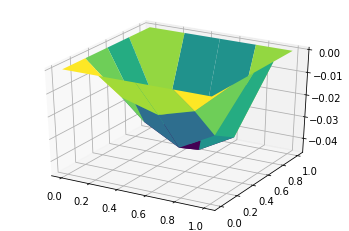

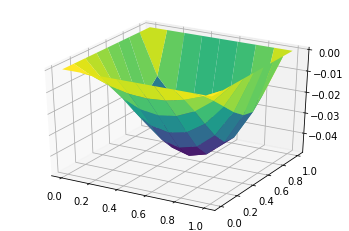

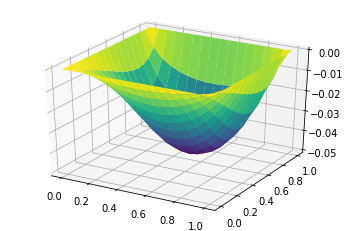

In [22]:
omega = float(input("Enter the value of omega : "))
for steps in space_step_x:
    steps_x = steps_y = np.floor((xn - x0)/steps)
    x = np.linspace(x0, xn, num=int(steps_x + 1))
    y = np.linspace(y0, yn, num=int(steps_y + 1))

    u = initialize(x0, y0, steps_x, steps_y, steps, steps)
    u = GaussSeidel_SOR(u, steps, steps, epsilon=0.00001, omega=omega)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X, Y = np.meshgrid(x,y)

    ax.plot_surface(X, Y, u, cmap='viridis')